## **Limpieza de Datos** 🌈

### **Importar Librerías 🥱**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random

import warnings
warnings.filterwarnings('ignore')

### **Crear Dataframe 🥱**

In [2]:
data = {
    'ID_Empleado': [101, 102, 103, 104, 105, 106, 107, 108, 102, 109, 110],
    'Nombre': ['Ana', 'Luis', 'Carlos', 'Marta', 'Sofía', 'Pedro', 'Lucía', 'Jorge', 'Luis', 'Elena', 'David'],
    'Edad': [28, 34, 29, 42, 35, 50, 23, 34, 34, 200, 25],
    'Departamento': ['Ventas', 'TI', 'Ventas', 'Marketing', 'TI', 'Recursos Humanos', 'Ventas', 'TI', 'TI', None, None],
    'Salario': [50000, 75000, 52000, np.nan, 78000, 65000, 48000, np.nan, 75000, 82000, 45000],
    'Email': ['ana@mail.com', 'luis@mail.com', 'carlos@mail.com', 'marta@mail', 'sofia@mail.com',
              'pedro@mail.com', 'lucia@mail.com', 'jorge@mail.com', 'luis@mail.com',
              'elena@mail.com', 'david@mail.com']
}
df = pd.DataFrame(data)

# Listas base para generar datos aleatorios
nombres = ['Ana', 'Luis', 'Carlos', 'Marta', 'Sofía', 'Pedro', 'Lucía', 'Jorge', 'Elena', 'David', 'María', 'Andrés', 'Paula', 'Camilo']
departamentos = ['Ventas', 'TI', 'Marketing', 'Recursos Humanos', 'Finanzas', 'Operaciones']
dominios = ['mail.com', 'empresa.com', 'corp.com']

# Generar 3000 registros sintéticos
n = 3000
df_expandido = pd.DataFrame({
    'ID_Empleado': np.arange(1000, 1000+n),  # IDs únicos
    'Nombre': [random.choice(nombres) for _ in range(n)],
    'Edad': [random.randint(20, 60) for _ in range(n)],  # edades realistas
    'Departamento': [random.choice(departamentos) for _ in range(n)],
    'Salario': [random.randint(40000, 90000) if random.random() > 0.05 else np.nan for _ in range(n)],  # algunos NaN
    'Email': [f"{random.choice(nombres).lower()}@{random.choice(dominios)}" for _ in range(n)]
})

df_final = pd.concat([df, df_expandido], ignore_index=True)

df_final.shape


(3011, 6)

In [3]:
df_final.head()

,ID_Empleado,Nombre,Edad,Departamento,Salario,Email
0,101,Ana,28,Ventas,50000.0,ana@mail.com
1,102,Luis,34,TI,75000.0,luis@mail.com
2,103,Carlos,29,Ventas,52000.0,carlos@mail.com
3,104,Marta,42,Marketing,NaN,marta@mail
4,105,Sofía,35,TI,78000.0,sofia@mail.com


### **Diagnosticar Problemas 🥱**

In [5]:
df_final.isna().sum()

,0
ID_Empleado,0
Nombre,0
Edad,0
Departamento,2
Salario,161
Email,0


In [6]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3011 entries, 0 to 3010
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Empleado   3011 non-null   int64  
 1   Nombre        3011 non-null   object 
 2   Edad          3011 non-null   int64  
 3   Departamento  3009 non-null   object 
 4   Salario       2850 non-null   float64
 5   Email         3011 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 141.3+ KB


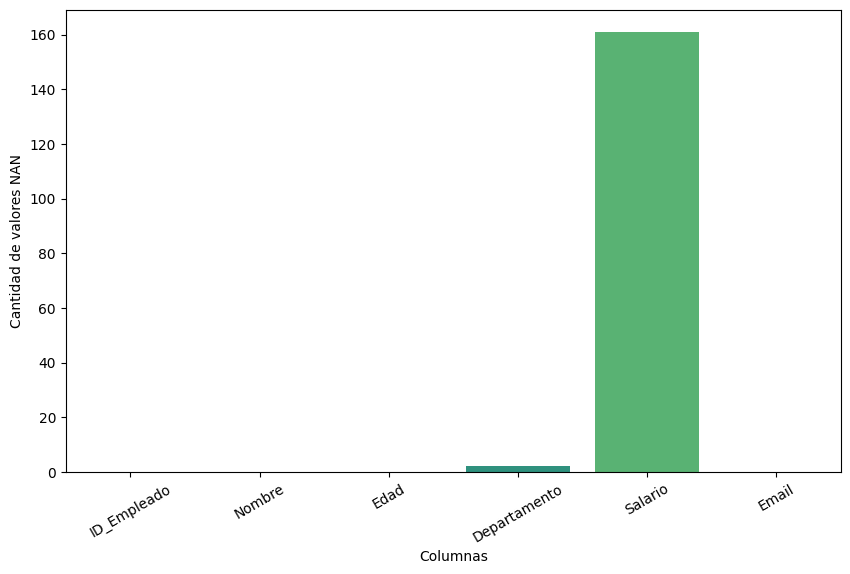

In [11]:
##Grafica de datos NAN
plt.figure(figsize=(10,6))
sns.barplot(x=df_final.isna().sum().index, y=df_final.isna().sum().values, palette='viridis')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores NAN')
plt.xticks(rotation=30)
plt.savefig('valores_nulos.png', dpi=400)
plt.show()

### **Manejo de datos NAN🥱**

<Axes: xlabel='Salario', ylabel='Density'>

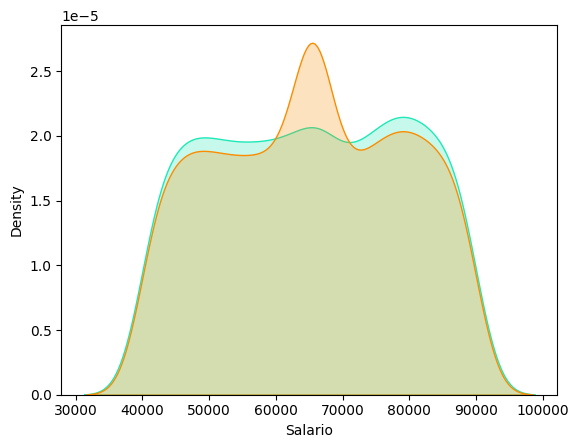

In [15]:
df_imputado = df_final.copy()

##Grafica del salario
sns.kdeplot(df_imputado['Salario'].dropna(), fill=True, color='#1de9b6')

##Limpieza tradicional
df_imputado['Salario'].fillna(df_imputado['Salario'].median(), inplace=True)

##Grafica despues de la limpieza
sns.kdeplot(df_imputado['Salario'], fill=True, color='#fb8c00')

In [17]:
df_imputado.isna().sum()

,0
ID_Empleado,0
Nombre,0
Edad,0
Departamento,2
Salario,0
Email,0


In [18]:
df_imputado['Departamento'].value_counts()

,count
Departamento,
Recursos Humanos,521
Finanzas,514
Marketing,500
Ventas,497
Operaciones,490
TI,487


In [23]:
df_imputado['Departamento'].mode()[0]

'Recursos Humanos'

In [24]:
df_imputado['Departamento'].fillna(df_imputado['Departamento'].mode()[0], inplace=True)

In [25]:
df_imputado['Departamento'].value_counts()

,count
Departamento,
Recursos Humanos,523
Finanzas,514
Marketing,500
Ventas,497
Operaciones,490
TI,487


### **KNN Imputer🥱**

In [26]:
df_vecinos = df_final.copy()

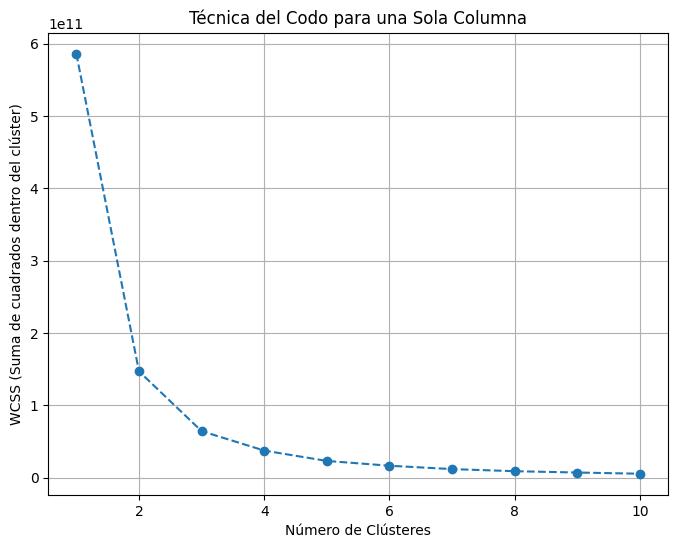

In [28]:
from sklearn.cluster import KMeans
# Seleccionar la columna y remodelarla para scikit-learn
X = df_vecinos['Salario'].dropna().values.reshape(-1, 1)

# Calcular la suma de los cuadrados dentro del clúster (WCSS)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Graficar la técnica del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Técnica del Codo para una Sola Columna')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS (Suma de cuadrados dentro del clúster)')
plt.grid(True)
plt.show()

In [29]:
from sklearn.impute import KNNImputer

# Seleccionar la columna como DataFrame (no Serie)
columna = df_vecinos[["Salario"]]

# Crear el imputador
imputer = KNNImputer(n_neighbors=3)

# Aplicar imputación
columna_imputada = imputer.fit_transform(columna)

# Reemplazar en el DataFrame original
df_vecinos["Salario"] = columna_imputada

df_vecinos["Salario"]

,Salario
0,50000.000000
1,75000.000000
2,52000.000000
3,65227.641754
4,78000.000000
...,...
3006,65227.641754
3007,57796.000000
3008,78865.000000
3009,46552.000000


In [30]:
df_vecinos.isna().sum()

,0
ID_Empleado,0
Nombre,0
Edad,0
Departamento,2
Salario,0
Email,0


In [32]:

np.random.seed(42)

data = {
    "Edad": np.random.randint(20, 60, size=10000).astype(float),
    "Salario": np.random.randint(40000, 90000, size=10000).astype(float),
    "HorasEstudio": np.random.randint(5, 20, size=10000).astype(float)
}

df = pd.DataFrame(data)

# Introducir NaN aleatorios
for col in df.columns:
    df.loc[df.sample(frac=0.2).index, col] = np.nan  # 20% de valores faltantes

df

,Edad,Salario,HorasEstudio
0,NaN,77528.0,8.0
1,NaN,71389.0,18.0
2,34.0,70346.0,NaN
3,27.0,62748.0,10.0
4,NaN,NaN,12.0
...,...,...,...
9995,22.0,76094.0,17.0
9996,35.0,65221.0,19.0
9997,23.0,40719.0,18.0
9998,42.0,NaN,15.0


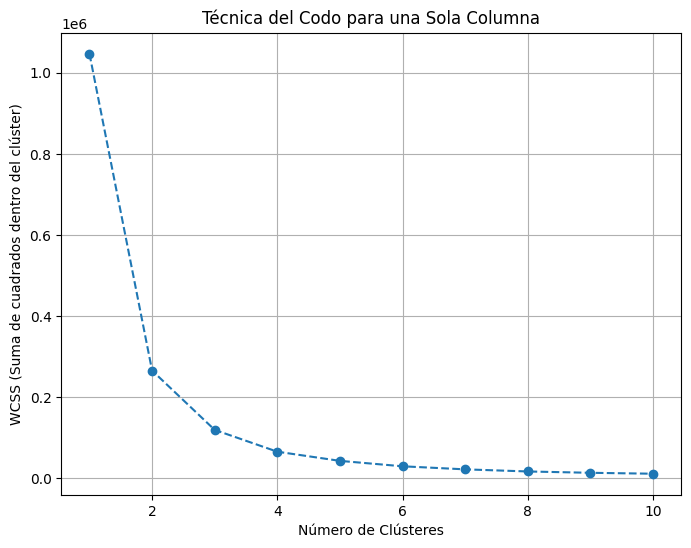

In [33]:
# Seleccionar la columna y remodelarla para scikit-learn
X = df['Edad'].dropna().values.reshape(-1, 1)

# Calcular la suma de los cuadrados dentro del clúster (WCSS)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Graficar la técnica del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Técnica del Codo para una Sola Columna')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS (Suma de cuadrados dentro del clúster)')
plt.grid(True)
plt.show()

In [34]:
from sklearn.impute import KNNImputer

# Seleccionar la columna como DataFrame (no Serie)
columna = df[["Edad"]]

# Crear el imputador
imputer = KNNImputer(n_neighbors=4)

# Aplicar imputación
columna_imputada = imputer.fit_transform(columna)

# Reemplazar en el DataFrame original
df[["Edad"]]  = columna_imputada

df[["Edad"]]

,Edad
0,39.549
1,39.549
2,34.000
3,27.000
4,39.549
...,...
9995,22.000
9996,35.000
9997,23.000
9998,42.000
